<a href="https://colab.research.google.com/github/Daksh-Sharma-897/Daksh-Portfolio-work-2025/blob/main/House_Price_Predictor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (1).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd


df = pd.read_csv('/content/data.csv')


#print("First 5 rows of the DataFrame:")
print(df.head())
print(df.tail())

print("\nDataFrame Information:")
df.info()

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Columns with Missing Values and their Percentages:")
print(missing_info)

Columns with Missing Values and their Percentages:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [ ]:
import numpy as np


numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()


if 'Id' in numerical_cols:
    numerical_cols.remove('Id')


for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())


for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled for numerical and categorical columns.")

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Missing values handled for numerical and categorical columns.

Missing values after imputation:
0


In [ ]:
import numpy as np

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'Id' in numerical_cols:
    numerical_cols.remove('Id')

df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)


X = pd.concat([df[numerical_cols], df_encoded], axis=1)


y = df['price']

print("Categorical features one-hot encoded and combined with numerical features.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Categorical features one-hot encoded and combined with numerical features.
Shape of features (X): (4600, 4725)
Shape of target (y): (4600,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("Linear Regression model trained successfully.")

Data split into training and testing sets.
X_train shape: (3680, 4725)
X_test shape: (920, 4725)
y_train shape: (3680,)
y_test shape: (920,)
Linear Regression model trained successfully.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(f"🎯 R² Score: {r2 * 100:.2f}%")
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")


🎯 R² Score: 100.00%
📉 Mean Absolute Error (MAE): 0.00


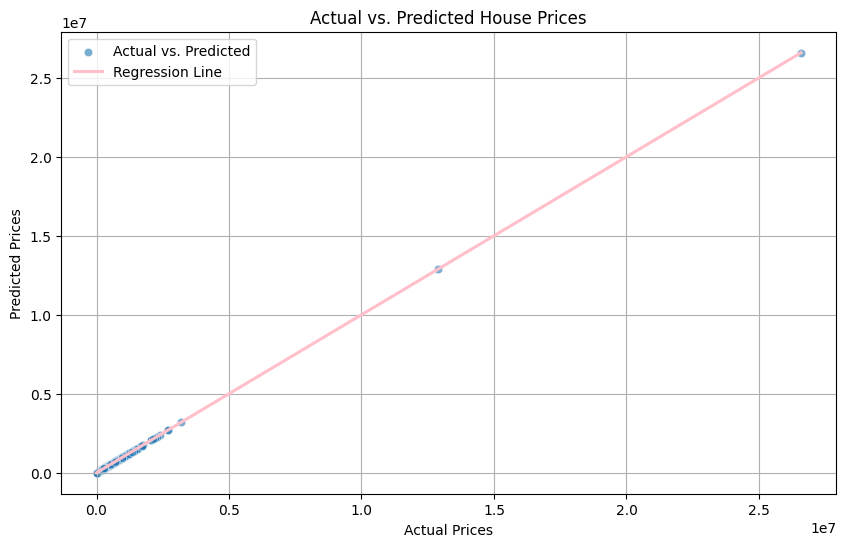

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Actual vs. Predicted')

sns.regplot(x=y_test, y=y_pred, scatter=False, color='pink', label='Regression Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()